<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/12%EC%9B%94%207%EC%9D%BC/12%EC%9B%94_7%EC%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multinomial Classification
- 3번째 예제(MNIST)

In [ ]:
# MNIST 데이터를 활용해 이미지 학습을 해보아요!
# Tensorflow Keras를 이용해서 구현해 보아요
# 이미지 처리는 결측치, 이상치 처리를 거의 할 필요가 없음
# why? -> 픽셀 정보를 뽑아낸 것이기 때문!

# 필요 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam,SGD

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/train.csv')
df.head()
# 확인해보니 784개의 pixel 정보가 있어요!
# label이 target(종속변수에요!)
# 독립변수(feature)는 784개에요!

# 결측치나 이상치는 없어요!(잘 정제되서 제공된 데이터이기 때문이에요!)
# 하지만 실무 가서는 반드시 체크해야 되요!!

# 정규화 하기 전, 일단 이미지가 어떤 이미지인지 눈으로 한번 확인하고 넘어가요!
# img_data = df.drop('label',axis=1,inplace=False).values

# 10장의 그림을 확인해 보아요!
# 2행 5열로 출력 => subplot 이용해서 그리면 되요!
# fig = plt.figure()

# fig_arr = []  # subplot을 저장하는 list
# for n in range(10):
#     fig_arr.append(fig.add_subplot(2,5,n+1))

#     fig_arr[n].imshow(img_data[n].reshape(28,28),
#                       cmap='gray',
#                       interpolation='nearest')   #imshow() - 그림 그리라는 의미
#                                                  # interpolation - 그림 고정하기 위한 옵션?
# plt.tight_layout()
# plt.show()

# featur engineering 할게 없어요
x_data = df.drop('label',axis=1,inplace=False).values
t_data = df['label'].values  # one-hot encoding 처리를 해줘야한다

# 정규화는 당연히 진행해야 해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# train, test data 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3,
                 random_state=1)

In [ ]:
# 데이터가 준비되었으니 모델 만들고 학습해 보아요!
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(784,)))
keras_model.add(Dense(units=10,
                      activation='softmax'))

keras_model.compile(optimizer=Adam(learning_rate=1e-4),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

keras_model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 학습을 진행해요!
# batch_size -> n개씩 나눠서 처리
history = keras_model.fit(x_data_train_norm,
                          t_data_train,
                          epochs=100,
                          verbose=1,
                          validation_split=0.2,
                          batch_size=100)

In [ ]:
# 학습이 잘 진행되었어요
# 이제 평가를 진행해 보아요
print(keras_model.evaluate(x_data_test_norm, t_data_test))
#[nan, 0.9135876297950745]  - 다시 확인해보기

# 결과 report(accuracy, recall, precision, f1)값을 구해보아요!
# classification_report()를 이용할 때 주의할 점! -> one-hot으로 표현하지 않는
# 1차원으로 표현(label값을 이용한 1차원 값으로 사용)

import tensorflow as tf
# 확률값을 label값으로 변환해야 해요!
predict_label = tf.argmax(keras_model.predict(x_data_test_norm),axis=1).numpy()  # argmax -> 가장 큰 값의 위치 찾아줌
print(classification_report(t_data_test,predict_label))

210/210 [==============================] - 0s 2ms/step - loss: nan - acc: 0.9148
[nan, 0.9147794842720032]
210/210 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       653
           1       0.95      0.98      0.96       751
           2       0.89      0.88      0.89       677
           3       0.88      0.90      0.89       700
           4       0.90      0.95      0.92       659
           5       0.90      0.84      0.87       604
           6       0.94      0.95      0.95       665
           7       0.94      0.91      0.92       699
           8       0.90      0.88      0.89       642
           9       0.89      0.88      0.88       662

    accuracy                           0.91      6712
   macro avg       0.91      0.91      0.91      6712
weighted avg       0.91      0.91      0.91      6712



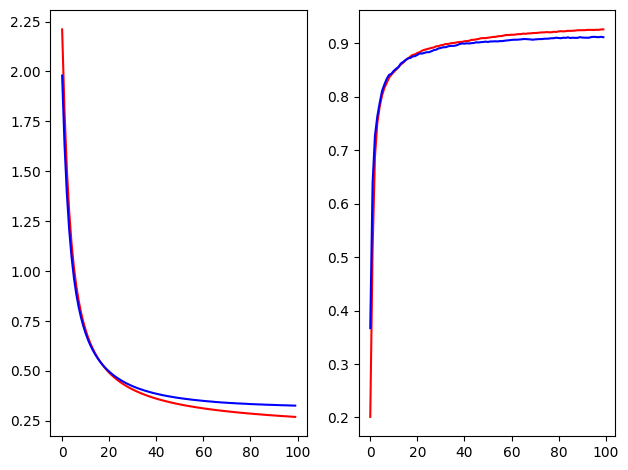

In [ ]:
# 그래프를 그려보아요!
loss = history.history['loss']
acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(loss,color='r')
ax1.plot(val_loss, color='b')

ax2.plot(acc,color='r')
ax2.plot(val_acc, color='b')

plt.tight_layout()
plt.show()

In [ ]:
# 제출파일 형식으로 결과를 Kaggle에 제출해
# 우리가 작성한 모델의 accuracy를 평가 받아 보아요!
# 각자 해보기! -> 복습때, 한번 더 ㄱ

test = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/test.csv')
test

submission = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/sample_submission.csv')
submission

# x_data_test_norm = scaler.transform(test.values)
# predict = keras_model.predict(x_data_test_norm)


,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [ ]:
# Fashion-MNIST 데이터를 활용
# 필요 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam,SGD

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/F_MNIST/fashion-mnist_train.csv')
df.head()
# 확인해보니 784개의 pixel 정보가 있어요!
# label이 target(종속변수에요!)
# 독립변수(feature)는 784개에요!

# 결측치나 이상치는 없어요!(잘 정제되서 제공된 데이터이기 때문이에요!)
# 하지만 실무 가서는 반드시 체크해야 되요!!

# 정규화 하기 전, 일단 이미지가 어떤 이미지인지 눈으로 한번 확인하고 넘어가요!
# img_data = df.drop('label',axis=1,inplace=False).values

# 10장의 그림을 확인해 보아요!
# 2행 5열로 출력 => subplot 이용해서 그리면 되요!
# fig = plt.figure()

# fig_arr = []  # subplot을 저장하는 list
# for n in range(10):
#     fig_arr.append(fig.add_subplot(2,5,n+1))

#     fig_arr[n].imshow(img_data[n].reshape(28,28),
#                       cmap='gray',
#                       interpolation='nearest')   #imshow() - 그림 그리라는 의미
#                                                  # interpolation - 그림 고정하기 위한 옵션?
# plt.tight_layout()
# plt.show()

# featur engineering 할게 없어요
x_data = df.drop('label',axis=1,inplace=False).values
t_data = df['label'].values  # one-hot encoding 처리를 해줘야한다

# 정규화는 당연히 진행해야 해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# train, test data 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3,
                 random_state=1)

In [ ]:
# 데이터가 준비되었으니 모델 만들고 학습해 보아요!
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(784,)))
keras_model.add(Dense(units=10,
                      activation='softmax'))

keras_model.compile(optimizer=Adam(learning_rate=1e-4),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

# 학습을 진행해요!
# batch_size -> n개씩 나눠서 처리
history = keras_model.fit(x_data_train_norm,
                          t_data_train,
                          epochs=100,
                          verbose=1,
                          validation_split=0.2,
                          batch_size=100)

# 학습이 잘 진행되었어요
# 이제 평가를 진행해 보아요
print(keras_model.evaluate(x_data_test_norm, t_data_test))
#[nan, 0.9135876297950745]  - 다시 확인해보기

# 결과 report(accuracy, recall, precision, f1)값을 구해보아요!
# classification_report()를 이용할 때 주의할 점! -> one-hot으로 표현하지 않는
# 1차원으로 표현(label값을 이용한 1차원 값으로 사용)

import tensorflow as tf
# 확률값을 label값으로 변환해야 해요!
predict_label = tf.argmax(keras_model.predict(x_data_test_norm),axis=1).numpy()  # argmax -> 가장 큰 값의 위치 찾아줌
print(classification_report(t_data_test,predict_label))

In [ ]:
# 비지도학습(데이터에 label, target, 종속변수가 없는 경우)에 대해서 알아보아요!
# 가장 대표적인 알고리즘은 K-means
# 이 K-means 알고리즘은 EM 알고리즘으로 작동
# EM의 E(Expectatiom)의 의미로 가장 가까운 centroid에 데이터를 군집으로 할당
# EM의 M(Maximization)의 의미로 cluster경계에 대한 중심(centroids)를 결정

# cluster의 경계가 변하지 않을때까지 반복해서 처리
# 그런데 초기 centroid의 선택에 따라 다르게 cluster가 생성될 수 있다
# 어떤 경우는 좋고, 어떤 경우는 좋지 않아요!
# 여러번 해요! 그 중 가장 좋은 경우를 결과로 사용

# 간단하게 코드로 표현해 보아요!
# 중심점이 4개인 데이터 100개를 무작위로 생성해서 정상적으로 클러스터가 생성되는지
# 확인해 보면 좋을거 같아요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 중심점이 4개인 100개의 랜덤 데이터 생성해요!
# n_samples : 전체 데이터 포인트의 수
# centers : 클러스터의 수
# n_features : 각 데이터 포인트의 feature 개수(데이터의 차원)
# random_state : 랜덤 값을 생성하기 위한 seed값(난수의 재현율을 보장하기 위해)
# points : 생성된 데이터의 feature
# labels : 각 데이터 포인트의 소속 클러스터 레이블
points,labels = make_blobs(n_samples=100,
                centers=4,
                n_features=2,
                random_state=100)

points.shape
labels.shape
np.unique(labels,return_counts=True)

(array([0, 1, 2, 3]), array([25, 25, 25, 25]))